<a href="https://colab.research.google.com/github/jam641/macaluso_DSPN_S23/blob/main/Exercise11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The Beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
# install and load packages
# install.packages("class")
library(tidyverse)
library(class)

# rename dataset
data <- diamonds
head(data)
mean(data$price) # just seeing mean = 3932.80
summary(data$price) # full summary statistics for reference, mean = 3933

# creating price_bin variable
data$price_bin = ifelse(data$price > 3933, 1, 0) # if > mean, then code as 1
head(data) # check column was added correctly

# select specific columns
data_final <- data %>% select(carat, depth, table, x, y, price_bin)
head(data_final)

# get dimensions
dim(data_final) # 53940 X 6

# set price_bin is a factor in final dataset
data_final$price_bin <- as.factor(data_final$price_bin) 
print(typeof(data_final$price_bin)) #sanity check

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


[1] 3932.8

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     950    2401    3933    5324   18823 

carat,cut,color,clarity,depth,table,price,x,y,z,price_bin
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,0
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,0
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,0
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,0
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,0
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,0


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

[1] "integer"


### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price. 

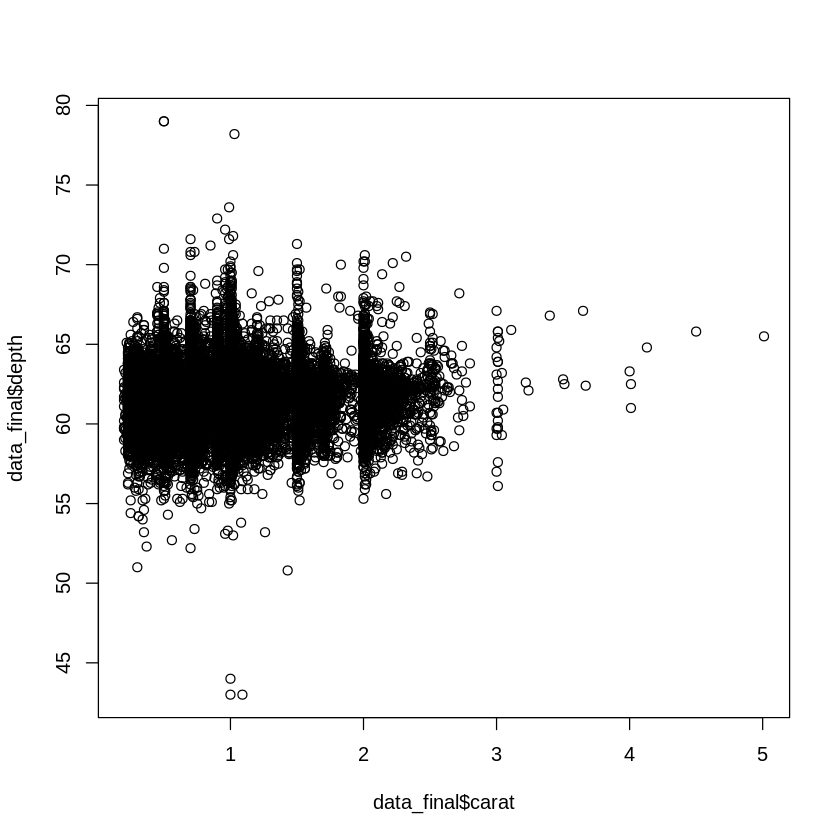

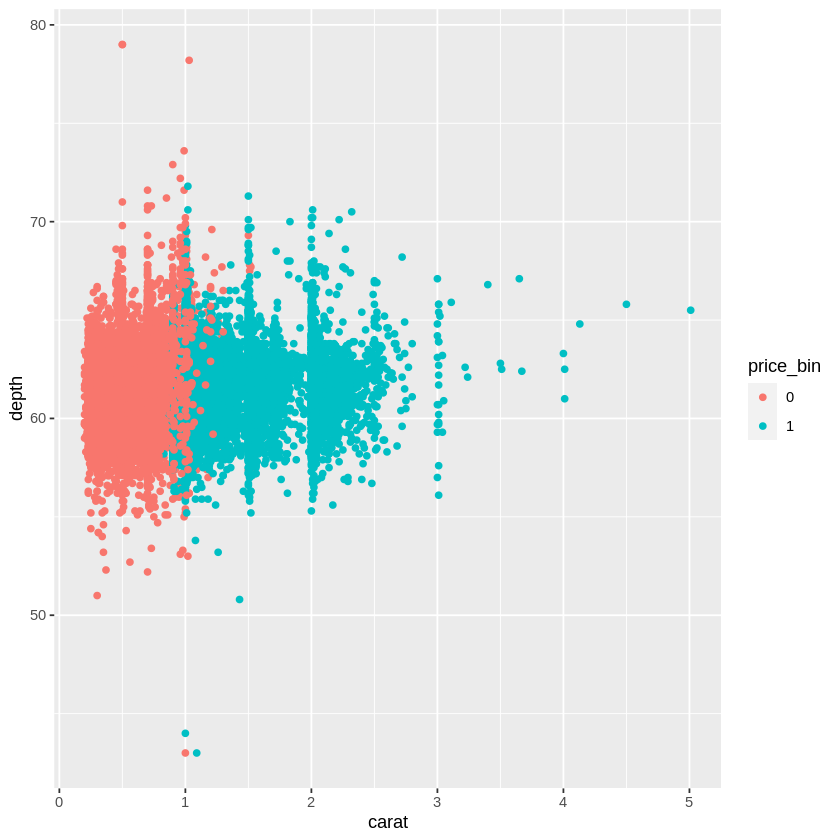

In [ ]:
# very basic plot for simple visualization for me
plot(data_final$carat, data_final$depth)

# scatterplot with color aes as asked for 
ggplot(data=data_final, aes(x=carat, y=depth, color=price_bin)) + 
  geom_point()

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict which price class the diamond will belong to? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?

> *I think kNN will perform well to predict which price class the diamond will belong to.*
> *Depth, on average, ranges between 50 and 70. Carat, on average, ranges from a little more than 0 to 3.*
> *Carat will provide the most information about which price class the diamond will belong to because both price_bins vary on average within the same depth. We see more of a distinction where diamonds that are smaller carat size cost less and diamonds that are larger carat sizes cost more, as seen in the graph. This also intuitively totally makes sense.*

### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)

# seeing how many observations there are
nrow(data_final) # 53940 total observations
53940*.3 # 16182, become our test set

# pulling a random sample of row indicies to make test set
test.inds <- sample(1:nrow(data_final),16182)

# TRUE/FALSE indicator for whether each observation is a test item or not. 
data_final$is.test <- 1:nrow(data_final) %in% test.inds 
head(data_final)
data_final # check that some is.test are true to indicate they are a test item

#################################################################################
# test and train separation (see below in next code block; did this over again
  # so it would be easier for me to do knn), but I wanted to leave this code for
  # myself for reference

  # TEST
test.preds <- (data_final[which(data_final$is.test == TRUE), ]) # test dataframe
nrow(test.preds) # 16182, sanity check
dim(test.preds) # 1798 X 7, full dimensions
  # TRAIN
train.preds <- (data_final[which(data_final$is.test == FALSE), ]) # train dataframe
nrow(train.preds) # 37758, sanity check
dim(train.preds) # 37758 X 7, full dimensions

[1] 53940

[1] 16182

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.21,59.8,61,3.89,3.84,0,TRUE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE


carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.21,59.8,61,3.89,3.84,0,TRUE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE
0.24,62.3,57,3.95,3.98,0,FALSE
0.26,61.9,55,4.07,4.11,0,FALSE
0.22,65.1,61,3.87,3.78,0,FALSE


[1] 16182

[1] 16182     7

[1] 37758

[1] 37758     7

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`. 

*Hint: Review the format required for the arguments of knn()*

In [ ]:
set.seed(2023)

#training data pulls the "not test" rows
train.preds <- cbind(data_final$carat[-test.inds], data_final$depth[-test.inds])
train.spec <- data_final$price_bin[-test.inds]
dim(train.preds) # dimensions check out
head(train.preds)
head(train.spec)

#testing data pulls the test rows
test.preds <- cbind(data_final$carat[test.inds], data_final$depth[test.inds])
dim(test.preds) # dimensions check out
head(test.preds)

#run knn
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)

#print first 10 test specifications
test.spec.knn[1:10]

[1] 37758     2

0.23,61.5
0.23,56.9
0.29,62.4
0.31,63.3
0.24,62.8
0.24,62.3


[1] 0 0 0 0 0 0
Levels: 0 1

[1] 16182     2

1.22,62.3
1.57,62.3
1.11,62.4
0.42,60.6
0.32,62.6
0.90,62.7


[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

Now, output a confusion matrix and calculate the test error to evaluate model performance. 

In [ ]:
# confusion matrix
confusion <- data.frame(predicted = test.spec.knn,actual = data_final$price_bin[test.inds])
table(confusion)
print("---")
print(paste("Accuracy:",mean(confusion$predicted == confusion$actual)))

         actual
predicted    0    1
        0 9707  316
        1  541 5618

[1] "---"
[1] "Accuracy: 0.947039920899765"


How did your model perform?
>*The accuracy came out as 94.7%, which is really high accuracy. Most of the test observations were correctly classified (5618/[5618 + 316]): 93.3%. Meaning, only about 5.7% of observations were misclassified. Most of the train observations were also correctly classified (9707/[9707 + 541]): 94.7%. Meaning, only about 5.3% of observations were misclassified. Overall, the model performed great.*

Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
set.seed(2023)
head(data_final)

#training data pulls the "not test" rows
train.preds2 <- cbind(data_final$carat[-test.inds], data_final$depth[-test.inds], data_final$table[-test.inds], data_final$x[-test.inds], data_final$y[-test.inds])
train.spec2 <- data_final$price_bin[-test.inds]

#testing data pulls the test rows
test.preds2 <- cbind(data_final$carat[test.inds], data_final$depth[test.inds], data_final$table[test.inds], data_final$x[test.inds], data_final$y[test.inds])

#run knn
test.spec.knn2 <- knn(train.preds2, test.preds2, train.spec2, k = 3) # keep k = 3

#print first 10 test specifications
test.spec.knn2[1:10]

# confusion matrix
confusion2 <- data.frame(predicted = test.spec.knn2,actual = data_final$price_bin[test.inds])
table(confusion2)
print("---")
print(paste("Accuracy:",mean(confusion2$predicted == confusion2$actual)))

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.21,59.8,61,3.89,3.84,0,TRUE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE


[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

         actual
predicted    0    1
        0 9728  392
        1  520 5542

[1] "---"
[1] "Accuracy: 0.943641082684464"


Did your model predictions improve?
>*The accuracy came out as 94.4%, which is really high accuracy, but very comparable to our other model. Most of the test observations were correctly classified (5542/[5542 + 392]): 93.4%. Meaning, only about 6.6% of observations were misclassified. Most of the train observations were also correctly classified (9728/[9728 + 520]): 94.9%. Meaning, only about 5.1% of observations were misclassified. Overall, the model performed great and adding additional predictors doesn't really change our error.*


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy. 

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`. 

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
# copy knn model from above
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)

# k is analogous to making a function with a given number of argument
  # could name "k" anything here 
for (k in seq(1:30)) { 
    test.spec.knn <- knn(train.preds, test.preds, train.spec, k = k) # your knn function here
    
    #overall error; make third confusion matrix
    confusion3 <- data.frame(predicted = test.spec.knn,actual = data_final$price_bin[test.inds])
    # print(paste("Accuracy:",mean(confusion3$predicted == confusion3$actual))
      # for me, to visualize the accuracy
    output$error[k]  <- (mean(confusion3$predicted != confusion3$actual))}

head(output) # error added correctly; around 5% or ~ .05

,k,error
,<int>,<dbl>
1,1,0.05314547
2,2,0.05425782
3,3,0.05357805
4,4,0.05302188
5,5,0.05271289
6,6,0.05289828


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


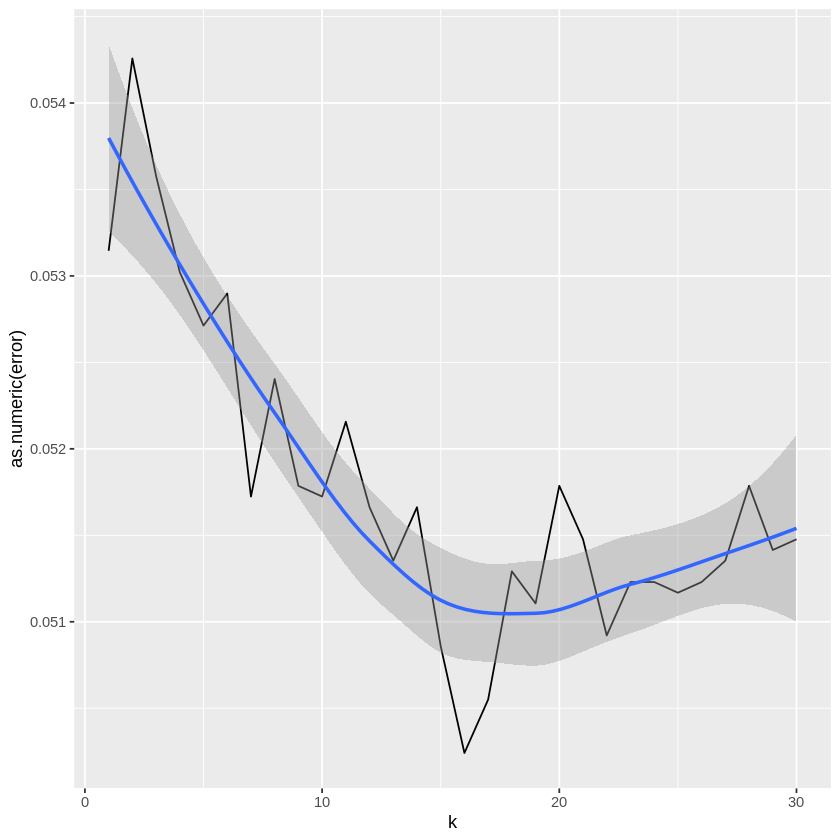

In [ ]:
ggplot(data=output, aes(x=k, y=as.numeric(error))) +
  geom_line() +
  geom_smooth()

# beware data leakage!!

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> *I'd select k = 17 since this is when my error appears to be at its lowest. The error dips around k = 15 to k = 20, so I'll go with the middle value. At k = 3, we have a higher error compared to k = 17. A too big k would cause less variance and a too small k would lead to overfitting. By choosing an appropriate k, in this case a larger but more appropriate k value (compared to k = 3), we have smoother and more accurate decision boundaries.*


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)
# k = 17

# I broke this section up into multiple code blocks so I would be able to 
  # parse everything apart and not wait forever for one big code block to run.

# standardize entire dataframe, except for price_bin
stand.df <- scale(data_final[,-6])
head(stand.df) #see standardized predictors

# merge dataframes; data_final and standardized predictors aka stand.df
stand.df2 <- cbind(stand.df, data_final)
head(stand.df2) # see merged dataframes

# make final dataframes with standardized predictors, including unstandardized 
  # price_bin
stand.df3 <- stand.df2 %>% select(1,2,3,4,5,6,12)
head(stand.df3) # sanity check, looks good
  # I'm sure there is an easier way to do this but oh well

# With standardized dataframe
#training data pulls the "not test" rows
train.preds3 <- cbind(stand.df3$carat[-test.inds], stand.df3$depth[-test.inds])
train.spec3 <- stand.df3$price_bin[-test.inds]

#testing data pulls the test rows
test.preds3 <- cbind(stand.df3$carat[test.inds], stand.df3$depth[test.inds])

#run knn
test.spec.knn3 <- knn(train.preds3, test.preds3, train.spec3, k = 17)

#print first 10 test specifications
test.spec.knn3[1:10]

carat,depth,table,x,y,is.test
-1.198157,-0.1740899,-1.0996618,-1.587823,-1.536181,-0.6546476
-1.240350,-1.3607259,1.5855140,-1.641310,-1.658759,1.5275111
-1.198157,-3.3849872,3.3756312,-1.498677,-1.457382,-0.6546476
-1.071577,0.4541292,0.2429261,-1.364959,-1.317293,-0.6546476
-1.029384,1.0823482,0.2429261,-1.240155,-1.212227,-0.6546476
-1.177060,0.7333376,-0.2046032,-1.596737,-1.553692,-0.6546476


,carat,depth,table,x,y,is.test,carat,depth,table,x,y,price_bin,is.test
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
1,-1.198157,-0.1740899,-1.0996618,-1.587823,-1.536181,-0.6546476,0.23,61.5,55,3.95,3.98,0,FALSE
2,-1.240350,-1.3607259,1.5855140,-1.641310,-1.658759,1.5275111,0.21,59.8,61,3.89,3.84,0,TRUE
3,-1.198157,-3.3849872,3.3756312,-1.498677,-1.457382,-0.6546476,0.23,56.9,65,4.05,4.07,0,FALSE
4,-1.071577,0.4541292,0.2429261,-1.364959,-1.317293,-0.6546476,0.29,62.4,58,4.20,4.23,0,FALSE
5,-1.029384,1.0823482,0.2429261,-1.240155,-1.212227,-0.6546476,0.31,63.3,58,4.34,4.35,0,FALSE
6,-1.177060,0.7333376,-0.2046032,-1.596737,-1.553692,-0.6546476,0.24,62.8,57,3.94,3.96,0,FALSE


,carat,depth,table,x,y,is.test,price_bin
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.198157,-0.1740899,-1.0996618,-1.587823,-1.536181,-0.6546476,0
2,-1.240350,-1.3607259,1.5855140,-1.641310,-1.658759,1.5275111,0
3,-1.198157,-3.3849872,3.3756312,-1.498677,-1.457382,-0.6546476,0
4,-1.071577,0.4541292,0.2429261,-1.364959,-1.317293,-0.6546476,0
5,-1.029384,1.0823482,0.2429261,-1.240155,-1.212227,-0.6546476,0
6,-1.177060,0.7333376,-0.2046032,-1.596737,-1.553692,-0.6546476,0


[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

In [ ]:
# confusion matrix number 4!
confusion4 <- data.frame(predicted = test.spec.knn3,actual = stand.df3$price_bin[test.inds])
table(confusion4)
print("---")
print(paste("Accuracy:",mean(confusion4$predicted == confusion4$actual)))
  # I wanted to see see the model accuracy and interpret it for practice

# error rate number 2!
output2  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output2) # looks good

# my new knn function
test.spec.knn3 <- knn(train.preds3, test.preds3, train.spec3, k = 20)

for (k in seq(1:30)) { 
    test.spec.knn3 <- knn(train.preds3, test.preds3, train.spec3, k = k) # your knn function here
    
    #overall error; plug in confusion matrix
    confusion4 <- data.frame(predicted = test.spec.knn3,actual = stand.df3$price_bin[test.inds])
    output2$error[k]  <- (mean(confusion4$predicted != confusion4$actual))}

head(output2) # looks good, error is about ~ .05 aka about 5%

         actual
predicted    0    1
        0 9713  284
        1  535 5650

[1] "---"
[1] "Accuracy: 0.949388209121246"


,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


,k,error
,<int>,<dbl>
1,1,0.05370164
2,2,0.05351625
3,3,0.05326906
4,4,0.05314547
5,5,0.05252750
6,6,0.05203312


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


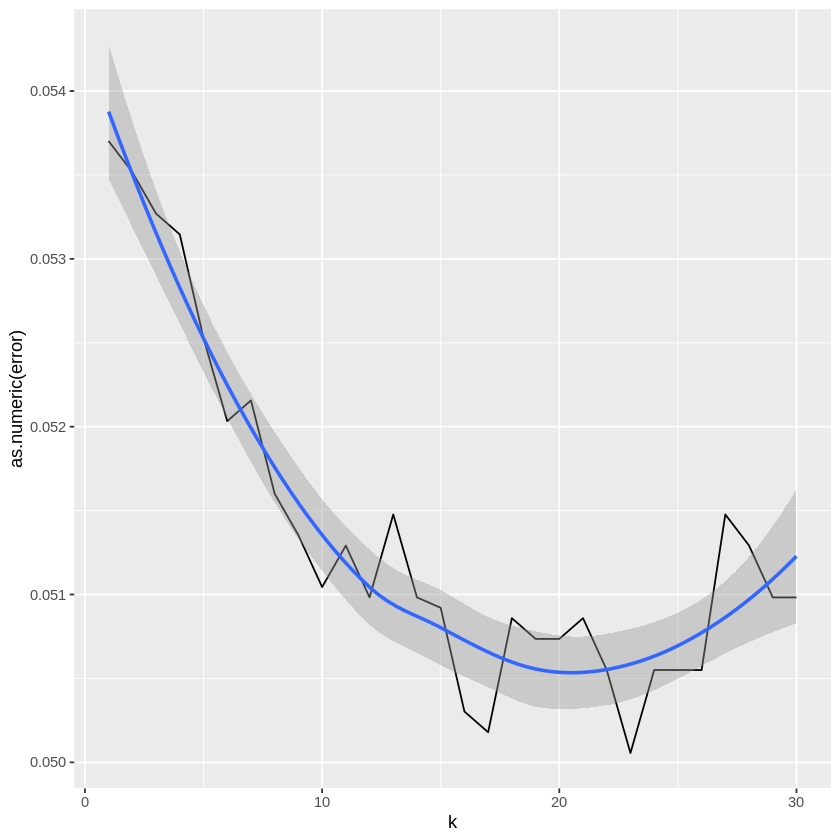

In [ ]:
ggplot(data=output2, aes(x=k, y=as.numeric(error))) +
  geom_line() +
  geom_smooth()

What impact did rescaling the data have on your error rate?
> *The accuracy came out as 94.9%, which is really high accuracy, but very comparable to our other models. Most of the test observations were correctly classified (5650/[5650 + 284]): 95.2%. Meaning, only about 4.8% of observations were misclassified. Most of the train observations were also correctly classified (9713/[9713 + 535]): 94.8%. Meaning, only about 5.2% of observations were misclassified.*

> *Rescaling didn't do much with respect to our error rate (both about 5%). The models and error rates are almost the same, with little variability between them. The optimal k looks like it would be about 20 here, but the graphs' both dip to have a lower error rate between about k = 17 and k = 21.*

**DUE:** 5pm March 22, 2023; got an extension until Friday, March 24th


**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Sara Jaramillo*
>
>
